<h1 style="color:brown;">  Hands on practice with neural network</h1> 

### Lesson plan

1. How to evaluate a model? <a href="https://colah.github.io/posts/2015-09-Visual-Information/">cross-entropy</a>
2. Types of Neural Nets
3. Keras & Tensorflow - specialized framework (python library) for machine learning
4. Hands on image reconstruction with Keras (approximately PCA)

### 2. Few of the types of neural networks  

- Classic - earlier today
- Auto-encoder (like PCA finding compressed representation) - now

the hidden layer is an encoding of the generalization
- Recurrent neural network - coming soon
- Convlutional neural networks - coming soon

![](./img/RNN.png)

![](./img/CNN.png)

![](./img/autorec.png)

### 3. Tensorflow and Keras
##### An Example

### Image Classification
[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) is a common benchmark in machine learning for image recognition. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

<img align =left src="./img/c10imgcat.png">

<img align =left src="./img/tf-logo3.png"><br>


This task can be accomplished in TensorFlow and the code can be found [here](https://github.com/tensorflow/models/tree/master/tutorials/image/cifar10/). Let's look at it together. 

<img align =left src="./img/keras.png"><br>

Now, the same task in [in Keras](https://keras.io/examples/cifar10_cnn/). After looking at it and comparing it to the tensorflow code, what do you notice? Any formatting look familiar?

### Similar to another scenario we've seen:

![statsmodels](./img/statsmodels_hybi_banner.png)

vs

![sklearn](./img/sklearn.png )

### Okay, but should I use Keras or Tensorflow?
![wrong question](https://www.pyimagesearch.com/wp-content/uploads/2018/10/keras_vs_tensorflow_wrong_question.jpg)

### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](./img/keras_2.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](./img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](./img/cat-tensors.gif)

## TensorFlow at its start

An open-source library

![more-arch](./img/layers.png)

### 2007 Keras was fully integrated into TensorFlow

It "comes with" Tensorflow and provides all the medium to high end API services to integrate with tensorflow processing.

![tensorflow-prog](./img/tensorflow_programming_environment.png)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit mroe complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage tensorflow commands within keras and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs. Keras is designed with the developer in mind. 


[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)

## More levers and buttons

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](./img/levers.jpeg)

### Building our first Neural Network - Auto-encoder

#### Install Keras & tensorflow

In [4]:
#!pip install tensorflow
#!pip install keras

### Keras basic syntax 

<a href="https://keras.io">Documentation</a>

In [2]:
import keras

In [3]:
## initialize the model
from keras.models import Sequential
model = Sequential()

In [5]:
from keras.layers import Input

## prepare a placeholder for input
# this is our input placeholder
inp = Input(shape=(784,)) # here shape (784, ) means we specify only the number of rows but we can input as many columns as we would like

W0711 13:56:41.247589 4562466240 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [ ]:
## Adding layers --> simple as .add()
## Remember Dense means linear layer + activation
## after the first layer, you don't need to specify
layer_1 = model.add(Dense(units=64, activation='relu'))(inp) # --> output will be (64, )
layer_2 = model.add(Dense(units=10, activation='softmax'))(layer_1)# --> output will be (10, )

In [ ]:
# Option I - gradient descent
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae', 'acc'])

# Option II - adadelta
model.compile(optimizer='adadelta', loss='binary_crossentropy')

<a href="https://keras.io/optimizers/">more optimizers</a>

In [ ]:
# Training the model!
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          validation_data=(X_test, Y_test)) 

In [ ]:
# Results of the model over epochs
history.history['val_acc'] 
history.history['loss']

In [ ]:
## Evaluate
loss_and_metrics = .evaluate(X_test, Y_test)

In [ ]:
### Useful
model.save(model_path) # Save your weights and computational graph
load_model(file_name) # loading the saved model from above
keras.layers.Reshape() # you might need to flatten an image, for example

### Your exercise:  Image reconstruction using auto-encoder

##### Import dataset - Mnist (handwritten digits)

In [66]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model, Input
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [67]:
### a. Load the Mnist dataset and split to train/test (use )
### b. Plot few images with their label
### c. reshape images to 784 dim vector and normalize (divide by 255)
### d. Create a new model with 1 Dense layers sized 32 (encoder) with relu layer. 
### Then add a dense layer sized 784 with sigmoid activation.
### Run it for 50 epochs with batches of 256. Use binary cross-entropy. 
### e. Plot the model loss
### f. Use predict to encode and decode x_test

In [221]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [222]:
len(X_train)

60000

In [223]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

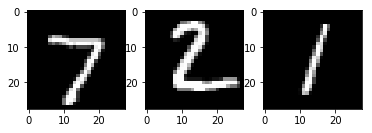

In [224]:
plt.subplot(1,3,1)
imshow(X_test[0], cmap = 'gray')
plt.subplot(1,3,2)
imshow(X_test[1], cmap = 'gray')
plt.subplot(1,3,3)
imshow(X_test[2], cmap = 'gray')

In [225]:
X_train = X_train.reshape(-1, 784).astype('float32')/255. #numpy will infer the other dimension if you use -1

X_test = X_test.reshape(-1, 784).astype('float32')/255.
X_test.shape

(10000, 784)

In [226]:
model = Sequential()
inp = Input(shape=(784,))

layer_1 = model.add(Dense(units=32, activation='relu')) # --> output will be (64, )
layer_2 = model.add(Dense(units=784, activation='sigmoid'))# --> output will be (10, )

In [227]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae', 'acc'])

# Option II - adadelta
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [228]:
history = model.fit(X_train, X_train,
          batch_size=256, epochs=100,
          validation_data=(X_test, X_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.3606 - val_loss: 0.2707
Epoch 2/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2625 - val_loss: 0.2511
Epoch 3/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2421 - val_loss: 0.2311
Epoch 4/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.2240 - val_loss: 0.2143
Epoch 5/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.2091 - val_loss: 0.2013
Epoch 6/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1978 - val_loss: 0.1914
Epoch 7/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1890 - val_loss: 0.1834
Epoch 8/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1817 - val_loss: 0.1767
Epoch 9/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1755 - val_loss: 0.1

60000/60000 [==============================] - 3s 46us/step - loss: 0.0998 - val_loss: 0.0982
Epoch 78/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.0997 - val_loss: 0.0981
Epoch 79/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0996 - val_loss: 0.0979
Epoch 80/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0995 - val_loss: 0.0978
Epoch 81/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.0993 - val_loss: 0.0977
Epoch 82/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0992 - val_loss: 0.0976
Epoch 83/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0991 - val_loss: 0.0975
Epoch 84/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0990 - val_loss: 0.0974
Epoch 85/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0989 - val_loss: 0.0973
Epoch 86/100
60000/60000 [========================

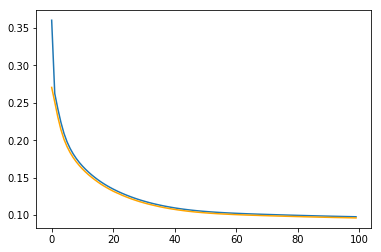

In [229]:

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'], color='orange')

In [230]:
loss_and_metrics = model.evaluate(X_test, X_test)

10000/10000 [==============================] - 0s 36us/step


In [231]:
predictions =  model.predict(X_test)
predictions_reshaped = predictions.reshape(-1,28,28)*255


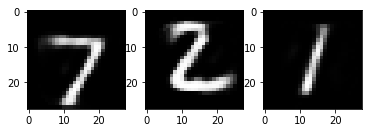

In [232]:
plt.subplot(1,3,1)
imshow(predictions_reshaped[0], cmap='gray')
plt.subplot(1,3,2)
imshow(predictions_reshaped[1], cmap='gray')
plt.subplot(1,3,3)
imshow(predictions_reshaped[2], cmap='gray')

In [215]:
# with this model we can take compressed image arrays (ones that are much smaller--32 dimensions 
# rather than 784) and fill in the gaps 
